# Predictive Analytics and Segmentation in the Automotive Industry: Price, Sales, Success, and Clustering

##  1. Car Price Prediction Model using Random Forest

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1.1 Load and preprocess
df = pd.read_excel('Car_Assignment.xlsx')
df = df.dropna(subset=['price'])
df = df.fillna(df.median(numeric_only=True))
X = df.drop(['price', 'car_ID'], axis=1, errors='ignore')
X = pd.get_dummies(X, drop_first=True)
y = df['price']

# 1.2 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1.3 Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 1.4 Evaluation
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

R²: 0.95


In [91]:
'''Model fits the training data very well with the value of R² 0.95 which is very close 
to 1.0, but there's a risk of overfitting the model might not perform well on unseen data
so we need to tune the model to get a good R² value on the test data.'''

# Tuning Model to get the good r2 value

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# 1.5 Load and preprocess
df = pd.read_excel('Car_Assignment.xlsx')
df = df.dropna(subset=['price'])
df = df.fillna(df.median(numeric_only=True))
X = df.drop(['price', 'car_ID'], axis=1, errors='ignore')
X = pd.get_dummies(X, drop_first=True)p
y = df['price']

# 1.6 Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1.7 Tuning Model
model = RandomForestRegressor(
    n_estimators=20,        # More trees
    max_depth=4,            # Slightly deeper trees
    min_samples_leaf=7,     # Fewer samples per leaf
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 1.8 Evaluation
r2 = r2_score(y_test, y_pred)
print(f"Tuned R²: {r2:.2f}")

Tuned R²: 0.89


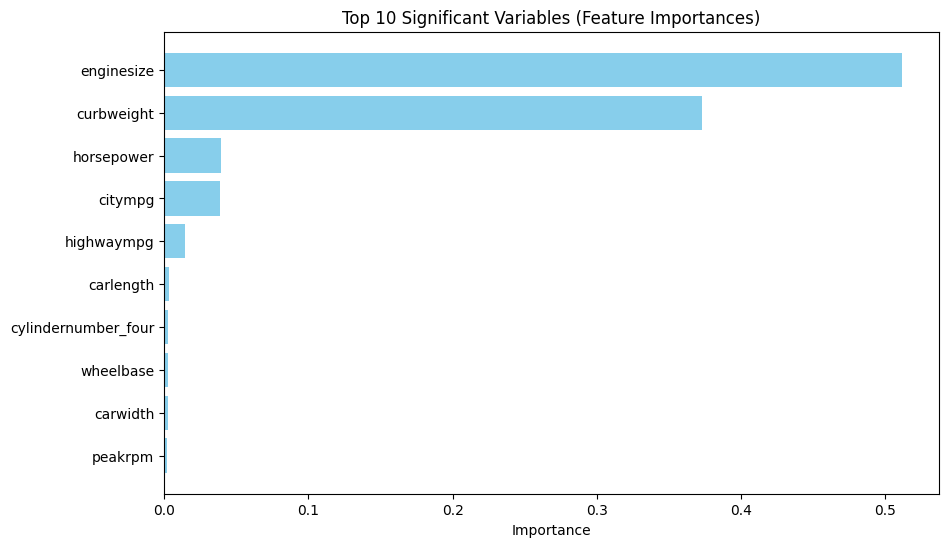

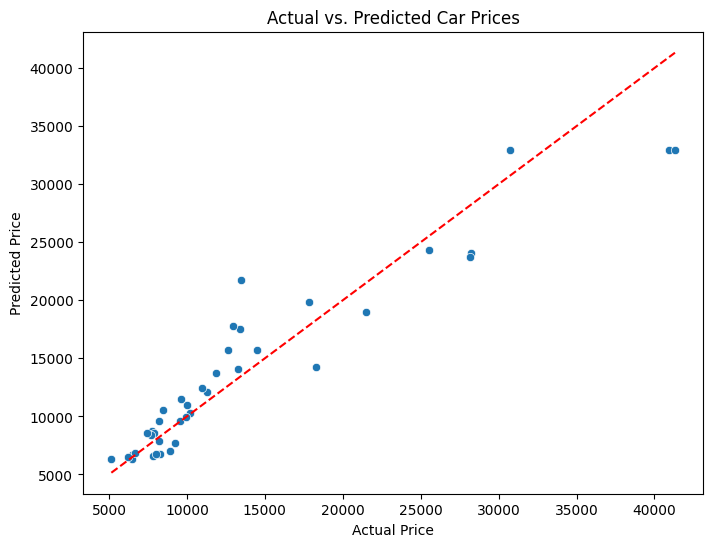

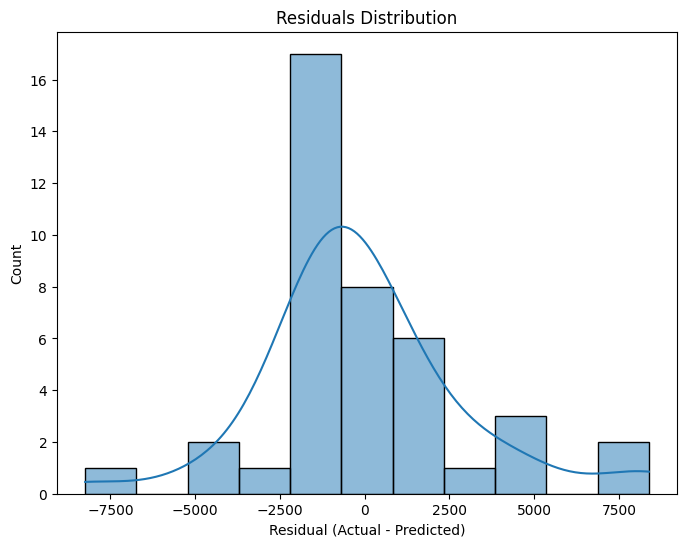

In [37]:
#Visualizations

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)  # Top 10 features

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Significant Variables (Feature Importances)')
plt.gca().invert_yaxis()
plt.show()

# Scatterplot: Actual vs. Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

# Histplot: Residuals Distribution
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residual (Actual - Predicted)')
plt.title('Residuals Distribution')
plt.show()

## 2. Binary Classification Models for Car Model Success

In [40]:
# 2.1 Target definition
median_price = df['price'].median()
df['success'] = (df['price'] >= median_price).astype(int)

# 2.2 Load and preprocess

X_cls = df.drop(['price', 'success', 'car_ID'], axis=1, errors='ignore')
X_cls = pd.get_dummies(X_cls, drop_first=True)
y_cls = df['success']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

# 2.3 Model Building & Training

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, roc_curve, auc, precision_recall_curve

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(Xc_train, yc_train)
y_pred_logreg = logreg.predict(Xc_test)
y_prob_logreg = logreg.predict_proba(Xc_test)[:,1]

# Random Forest Classifier
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(Xc_train, yc_train)
y_pred_rf = rf_cls.predict(Xc_test)
y_prob_rf = rf_cls.predict_proba(Xc_test)[:,1]

# 2.4 Model Comparison in order to know which model is performing better

# Confusion Matrices
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(yc_test, y_pred_logreg))
print("Random Forest Confusion Matrix:\n", confusion_matrix(yc_test, y_pred_rf))

# ROC-AUC
roc_auc_logreg = roc_auc_score(yc_test, y_prob_logreg)
roc_auc_rf = roc_auc_score(yc_test, y_prob_rf)
print(f"Logistic Regression ROC-AUC: {roc_auc_logreg:.3f}")
print(f"Random Forest ROC-AUC: {roc_auc_rf:.3f}")

# Precision-Recall AUC
precision_logreg, recall_logreg, _ = precision_recall_curve(yc_test, y_prob_logreg)
pr_auc_logreg = auc(recall_logreg, precision_logreg)
precision_rf, recall_rf, _ = precision_recall_curve(yc_test, y_prob_rf)
pr_auc_rf = auc(recall_rf, precision_rf)
print(f"Logistic Regression PR-AUC: {pr_auc_logreg:.3f}")
print(f"Random Forest PR-AUC: {pr_auc_rf:.3f}")

c:\Users\129ra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Confusion Matrix:
 [[22  1]
 [ 1 17]]
Random Forest Confusion Matrix:
 [[21  2]
 [ 0 18]]
Logistic Regression ROC-AUC: 0.995
Random Forest ROC-AUC: 0.998
Logistic Regression PR-AUC: 0.994
Random Forest PR-AUC: 0.997


In [41]:
'''Based on the confusion matrices and AUC scores, both models perform well,
but Random Forest slightly outperforms Logistic Regression. It has 0 false negatives. 
Additionally, it shows slightly higher ROC-AUC (0.998) and PR-AUC (0.997), 
indicating better classification performance overall. So I would choose Random Forest 
because it achieved higher ROC-AUC and PR-AUC scores, and more importantly, 
it had no false negatives — which is critical when missing a positive class 
carries a high cost.'''

# 2.5 Feature Importances For Random Forest

importances = rf_cls.feature_importances_
features = X_cls.columns
feat_imp_cls = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_cls = feat_imp_cls.sort_values(by='Importance', ascending=False).head(10)
print(feat_imp_cls)

            Feature  Importance
5        curbweight    0.117267
6        enginesize    0.077833
10       horsepower    0.077791
13       highwaympg    0.076611
3          carwidth    0.075295
2         carlength    0.071634
12          citympg    0.065891
1         wheelbase    0.058233
7         boreratio    0.043851
169  drivewheel_rwd    0.032561


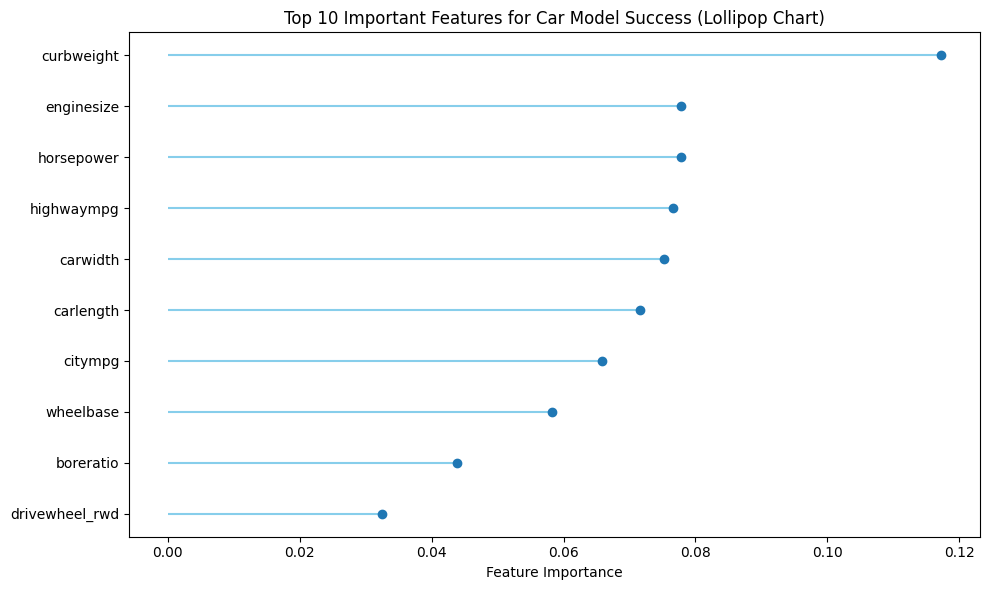

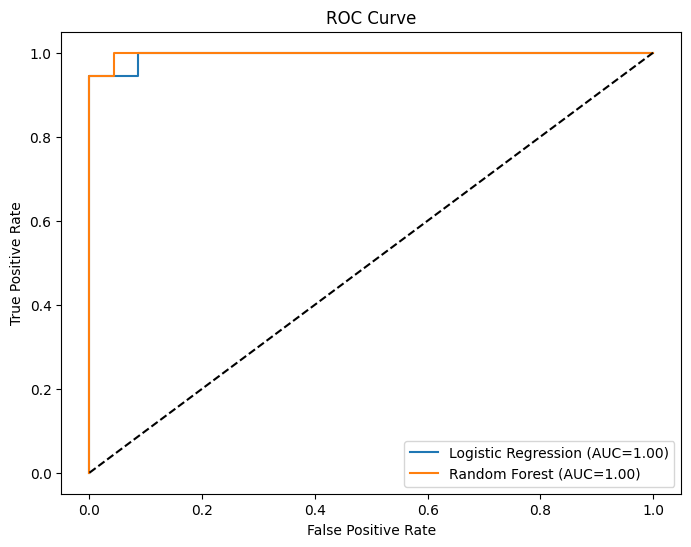

In [46]:
# Visualizations

import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance

feat_imp_cls = feat_imp_cls.sort_values('Importance', ascending=True)
plt.figure(figsize=(10,6))
plt.hlines(y=feat_imp_cls['Feature'], xmin=0, xmax=feat_imp_cls['Importance'], color='skyblue')
plt.plot(feat_imp_cls['Importance'], feat_imp_cls['Feature'], "o")
plt.xlabel('Feature Importance')
plt.title('Top 10 Important Features for Car Model Success (Lollipop Chart)')
plt.tight_layout()
plt.show()

# ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(yc_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(yc_test, y_prob_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC={roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={roc_auc_rf:.2f})')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## 3. Car Segmentation Using Clustering

In [ ]:
# 3.1 Feature Selection & Scaling

import pandas as pd
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['enginesize', 'price', 'fueltype', 'Successful_Model']
df_cluster = df[features].copy()

# Encode categorical variable
df_cluster = pd.get_dummies(df_cluster, columns=['fueltype'], drop_first=True)

# Scale features
scaler = StandardScaler()
X_cluster = scaler.fit_transform(df_cluster)

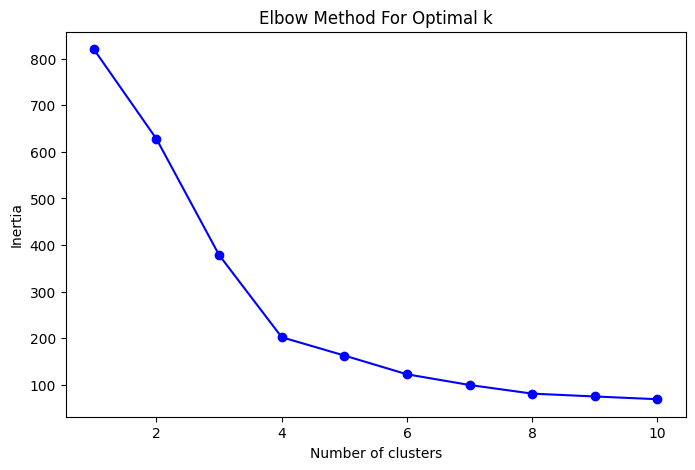

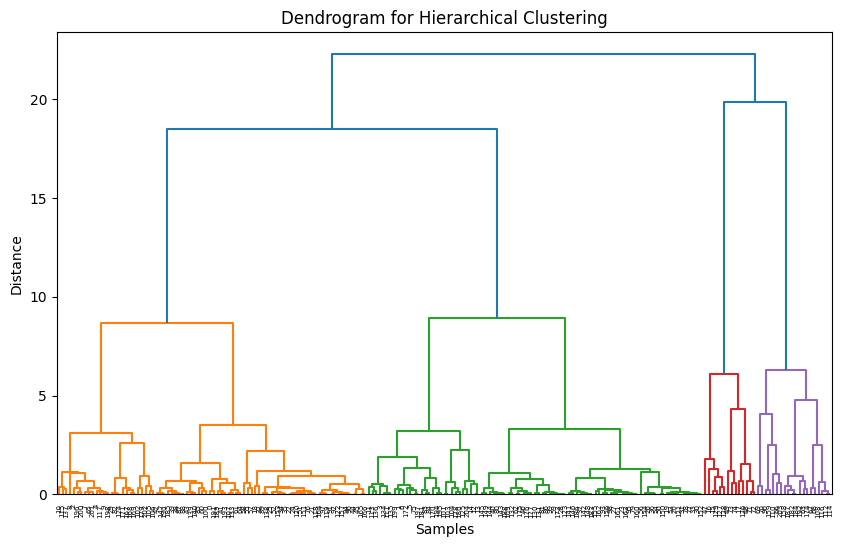

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 3.2 Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# 3.3 Dendrogram
linked = linkage(X_cluster, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

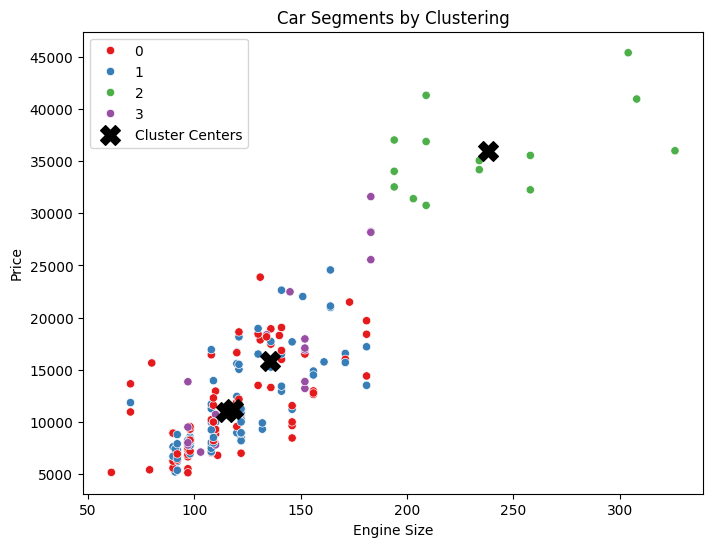

Cluster Centers (original scale):
 [[ 1.15073171e+02  1.09779289e+04  1.00000000e+00  1.00000000e+00]
 [ 1.18337079e+02  1.12520562e+04  4.99600361e-16  1.00000000e+00]
 [ 2.38142857e+02  3.59528214e+04  5.71428571e-01  1.00000000e+00]
 [ 1.35700000e+02  1.58381500e+04  3.50000000e-01 -2.22044605e-16]]


In [51]:
# 3.4 Apply KMeans
optimal_k = 4  # Set based on elbow/dendrogram
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='enginesize', y='price', hue='cluster', palette='Set1')
plt.scatter(
    original_centers[:, 0],  # enginesize
    original_centers[:, 1],  # price
    s=200, c='black', marker='X', label='Cluster Centers'
)
plt.title('Car Segments by Clustering')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.legend()
plt.show()

# Cluster centers (in original scale)
original_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):\n", original_centers)

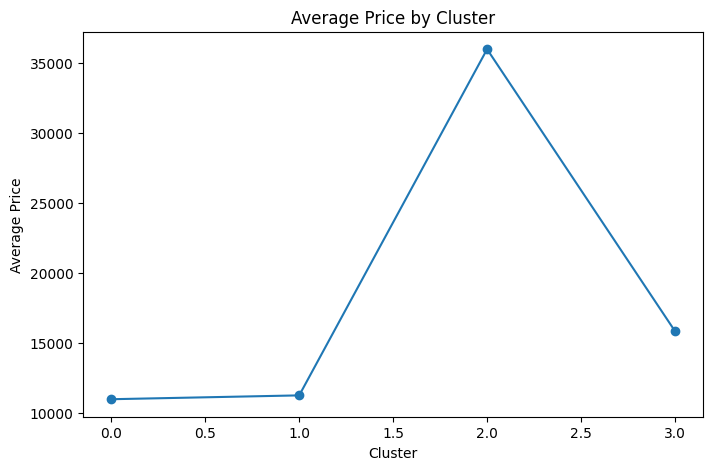

In [52]:
# 3.5 Forecast Value with Line Chart

# Example: Line chart of average price per cluster
cluster_avg = df.groupby('cluster')['price'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.plot(cluster_avg['cluster'], cluster_avg['price'], marker='o')
plt.xlabel('Cluster')
plt.ylabel('Average Price')
plt.title('Average Price by Cluster')
plt.show()

## 4. Car Sales Weekly Forecast (Time Series Model)

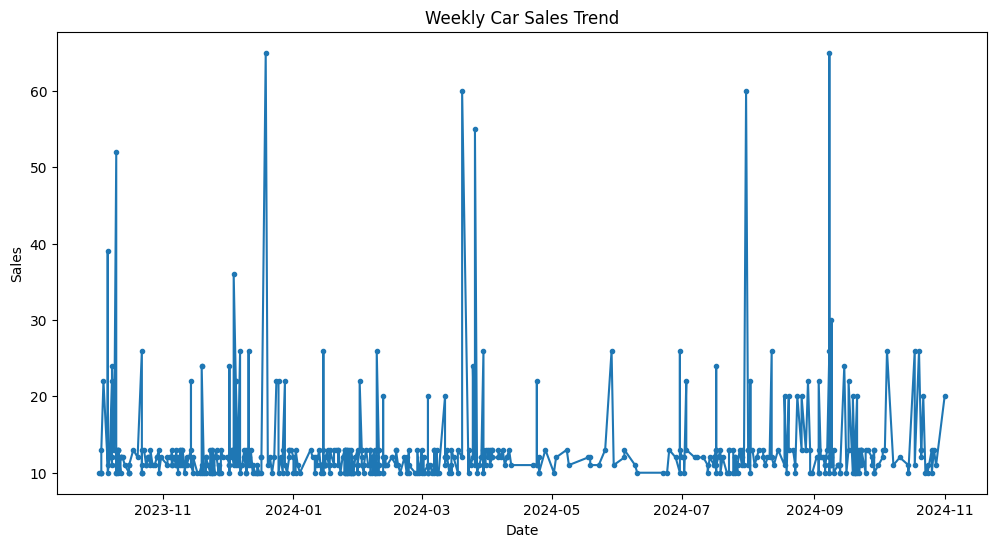

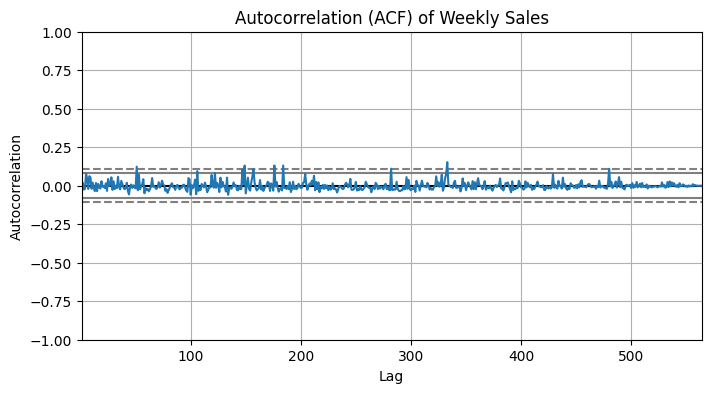

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from pandas.plotting import autocorrelation_plot

# 4.1 Load sales data from Sheet 2
sales_df = pd.read_excel('Car_Assignment.xlsx', sheet_name='Car_Assignment2')
sales_df['Date'] = pd.to_datetime(sales_df['Date'])
sales_df = sales_df.set_index('Date').sort_index()

# 4.2 Visualize sales trend
plt.figure(figsize=(12,6))
plt.plot(sales_df['Sales'], marker='.')
plt.title('Weekly Car Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# 4.3 ACF Test
plt.figure(figsize=(8,4))
autocorrelation_plot(sales_df['Sales'])
plt.title('Autocorrelation (ACF) of Weekly Sales')
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import Holt

weekly_sales = sales_df['Sales'].resample('W').sum()

# 4.4 Model Building: ARIMA, Simple Exponential Smoothing, and Holt's Linear Trend

train_sales = weekly_sales.iloc[:-12]
test_sales = weekly_sales.iloc[-12:]

# ARIMA Model
arima_model = ARIMA(train_sales, order=(1,1,1))
arima_fit = arima_model.fit()
arima_pred = arima_fit.forecast(steps=12)
arima_mae = mean_absolute_error(test_sales, arima_pred)
arima_rmse = np.sqrt(mean_squared_error(test_sales, arima_pred))

print(f"ARIMA MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")

# Simple Exponential Smoothing Model
exp_model = ExponentialSmoothing(train_sales, trend=None, seasonal=None)
exp_fit = exp_model.fit()
exp_pred = exp_fit.forecast(steps=12)
exp_mae = mean_absolute_error(test_sales, exp_pred)
exp_rmse = np.sqrt(mean_squared_error(test_sales, exp_pred))
print(f"ExpSmoothing MAE: {exp_mae:.2f}, RMSE: {exp_rmse:.2f}")

# Holt's Linear Trend Model
holt_model = Holt(train_sales)
holt_fit = holt_model.fit()
holt_pred = holt_fit.forecast(steps=12)
holt_mae = mean_absolute_error(test_sales, holt_pred)
holt_rmse = np.sqrt(mean_squared_error(test_sales, holt_pred))
print(f"Holt's Linear MAE: {holt_mae:.2f}, RMSE: {holt_rmse:.2f}")

ARIMA MAE: 51.70, RMSE: 71.36
ExpSmoothing MAE: 55.40, RMSE: 69.40
Holt's Linear MAE: 61.71, RMSE: 76.25


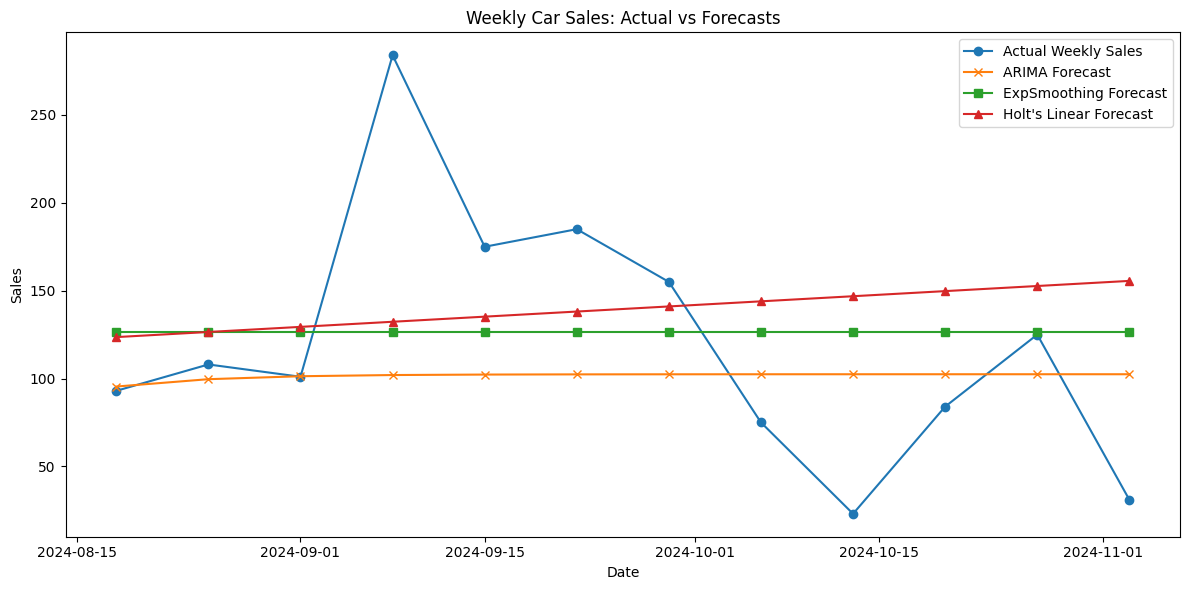

In [ ]:
'''ExpSmoothing has the lowest RMSE (69.40), which means it has the smallest typical error.
ARIMA has the lowest MAE (51.70), meaning it has the smallest average error.

If you prioritize lower RMSE (less impact from large errors), ExpSmoothing works best.
If you prioritize lower average error, ARIMA works best.

Overall, ExpSmoothing is slightly better due to its lower RMSE.'''

# 4.5 Visualize forecasts

plt.figure(figsize=(12,6))
plt.plot(test_sales.index, test_sales, label='Actual Weekly Sales', marker='o')
plt.plot(test_sales.index, arima_pred, label='ARIMA Forecast', marker='x')
plt.plot(test_sales.index, exp_pred, label='ExpSmoothing Forecast', marker='s')
plt.plot(test_sales.index, holt_pred, label="Holt's Linear Forecast", marker='^')
plt.title('Weekly Car Sales: Actual vs Forecasts')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

## 5. Relationship Between Price, Ad Spend, and Sales (Mixed Effects Model)

   Car_Id  Sales  Month  Price  Ad Spend
0       1     26      1  53162        14
1       2     13      1  50117        23
2       3     11      1  51591        24
3       4     10      1  54975        25
4       5     12      1  50103        25
           Car_Id       Sales       Month         Price    Ad Spend
count  243.000000  243.000000  243.000000    243.000000  243.000000
mean    27.008230   12.576132    2.979424  55053.798354   17.790123
std     17.256929    5.784470    2.049891   2981.645671    4.733517
min      1.000000   10.000000    1.000000  50010.000000   10.000000
25%     13.000000   11.000000    1.000000  52612.500000   14.000000
50%     25.000000   12.000000    2.000000  54628.000000   18.000000
75%     39.500000   13.000000    4.000000  57748.500000   22.000000
max     70.000000   60.000000    7.000000  59926.000000   25.000000


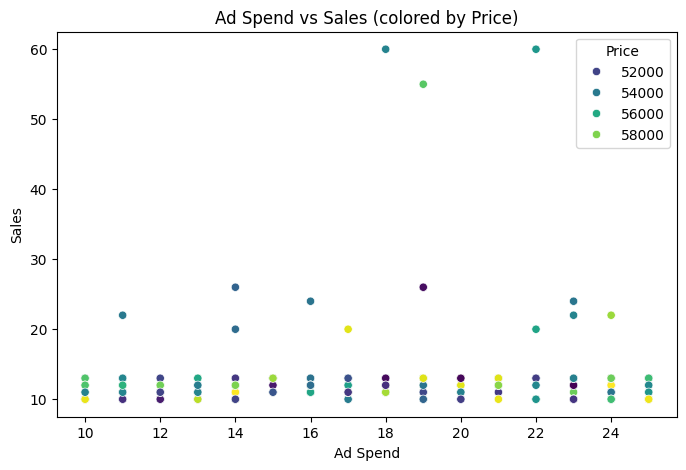

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

# 5.1 Load data from Car_Assignment3
df3 = pd.read_excel('Car_Assignment.xlsx', sheet_name='Car_Assignment3')

# 5.2 Quick exploration
print(df3.head())
print(df3.describe())

# 5.3 Visualize relationships
plt.figure(figsize=(8,5))
sns.scatterplot(data=df3, x='Ad Spend', y='Sales', hue='Price', palette='viridis')
plt.title('Ad Spend vs Sales (colored by Price)')
plt.xlabel('Ad Spend')
plt.ylabel('Sales')
plt.show()

In [86]:
'''While the scatterplot shows no clear relationship between ad spend, price, and sales,
it does not account for differences between car models or other hidden factors.
To understand the true drivers of sales and control for car-specific effects, we use a 
mixed effects model. This approach helps separate the impact of price and ad spend from the
inherent differences between car models, providing a more accurate and actionable analysis
for decision-making.'''

# 5.4 Mixed Effects Model: Sales ~ Price + Ad Spend + (1|Car_Id)
model = smf.mixedlm("Sales ~ Price + Q('Ad Spend')", df3, groups=df3["Car_Id"])
result = model.fit()
print(result.summary())

# 5.5 Visualize fixed effects
fixed_effects = result.fe_params
print("Fixed Effects Coefficients:")
print(fixed_effects)

         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Sales    
No. Observations: 243     Method:             REML     
No. Groups:       70      Scale:              20.0037  
Min. group size:  1       Log-Likelihood:     -753.6216
Max. group size:  5       Converged:          Yes      
Mean group size:  3.5                                  
-------------------------------------------------------
              Coef.  Std.Err.   z   P>|z| [0.025 0.975]
-------------------------------------------------------
Intercept     11.475    5.943 1.931 0.053 -0.173 23.123
Price          0.000    0.000 0.073 0.942 -0.000  0.000
Q('Ad Spend')  0.026    0.068 0.384 0.701 -0.108  0.160
Group Var     11.534    0.699                          

Fixed Effects Coefficients:
Intercept        11.475212
Price             0.000008
Q('Ad Spend')     0.026253
dtype: float64


C:\Users\129ra\AppData\Local\Temp\ipykernel_27504\1620506284.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fixed_effects.index, y=fixed_effects.values, palette='viridis')


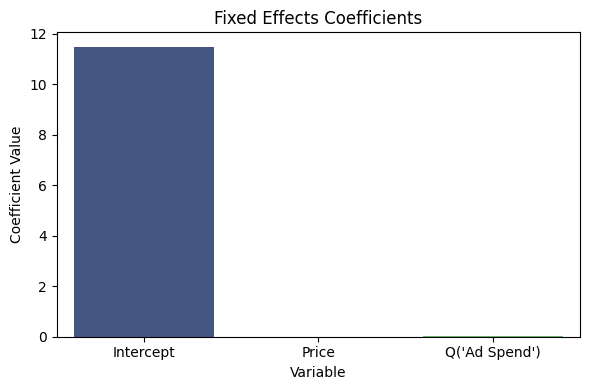

In [90]:
# 5.6 Plot coefficients
plt.figure(figsize=(6,4))
sns.barplot(x=fixed_effects.index, y=fixed_effects.values, palette='viridis')
plt.title('Fixed Effects Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Variable')
plt.tight_layout()
plt.show()